In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import sklearn

Import des données

In [2]:
data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t", low_memory=False)
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Nettoyage des données

## Analyse de forme

In [3]:
df = data.copy()

Dimensions du tableau

In [4]:
df.shape

(320772, 162)

Types et nombre de variables associées

In [5]:
df.dtypes.value_counts()

float64    106
object      56
dtype: int64

In [6]:
# Pour pouvoir observer toutes les colonnes
pd.set_option("display.max_column", 162)

In [7]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

### Nan values

<AxesSubplot:>

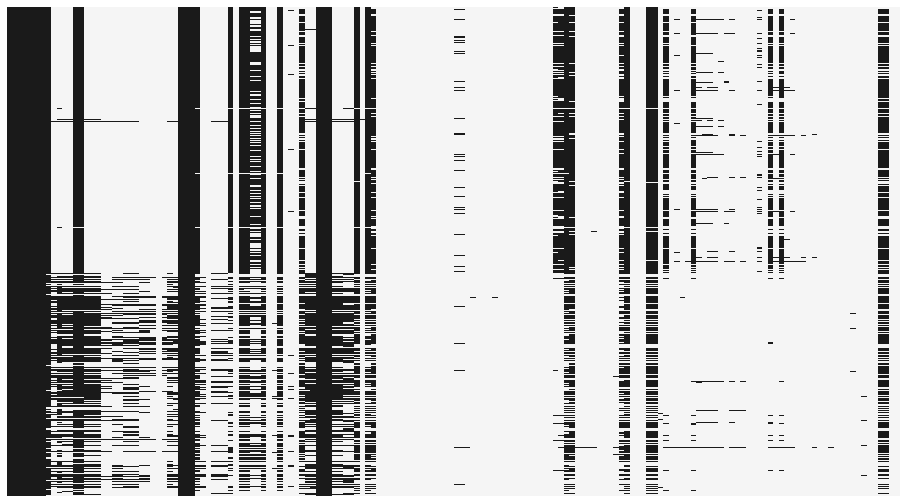

In [8]:
plt.figure(figsize=(16,9))
plt.tick_params(labelbottom=False, labelleft=False)
sns.heatmap(df.isna(), cbar=False, cmap=['k', 'whitesmoke'])

In [9]:
df.isna().mean().mean()

0.7622157263195134

In [10]:
# pour pouvoir observer toutes les lignes de la commande suivante
pd.set_option("display.max_row", 162)
df.isna().mean().sort_values()

last_modified_t                               0.000000
last_modified_datetime                        0.000000
creator                                       0.000006
created_t                                     0.000009
created_datetime                              0.000028
code                                          0.000072
url                                           0.000072
states                                        0.000143
states_tags                                   0.000143
states_fr                                     0.000143
countries_fr                                  0.000873
countries                                     0.000873
countries_tags                                0.000873
product_name                                  0.055373
brands                                        0.088574
brands_tags                                   0.088599
energy_100g                                   0.185986
proteins_100g                                 0.189699
salt_100g 

In [11]:
# Nombre de variables qui ont plus de 90% de valeurs manquantes
(df.isna().mean() > .9).sum()

100

In [12]:
# Nombre de variables qui ont plus de 90% de valeurs manquantes et qui sont vendus en France
(df[df['countries_fr'] == 'France'].isna().mean() > .9).sum()

96

## Visualisation initiale - élimination des données inutiles

On ne garde que les produits vendus en France

In [13]:
df = df[df['countries_fr'] == 'France']
df.shape

(94392, 162)

On ne garde que les variables qui ont moins de 90% de nan

In [14]:
df = df[df.columns[df.isna().mean() < .9]]
df.shape

(94392, 66)

In [15]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'allergens',
       'traces', 'traces_tags', 'traces_fr', 'serving_size', 'additives_n',
       'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image

On ne garde que les variables intéressantes

In [16]:
df = df[
    ['product_name', 'nutrition_grade_fr', 'nutrition-score-fr_100g',
     'pnns_groups_1', 'pnns_groups_2', 'main_category_fr',
     'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
     'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
     'additives_n'
     ]
]
df.shape

(94392, 15)

On rajoute les colonnes qui seront utiles pour notre application

In [17]:
df[['alcohol_100g', 'cholesterol_100g']] = data[['alcohol_100g', 'cholesterol_100g']]

In [18]:
df[['alcohol_100g', 'cholesterol_100g']].isna().mean()

alcohol_100g        0.976894
cholesterol_100g    0.997362
dtype: float64

La colonne `cholesterol_100g` est très peu renseignée dans les produits français comparé aux autres pays

In [19]:
data['cholesterol_100g'].isna().mean()

0.5508024391156335

In [20]:
df.shape

(94392, 17)

On remplace les valeurs 'unknown' dans `pnns_groups_1` et `pns_groups_2` par des nan

In [21]:
df.loc[df['pnns_groups_1'] == 'unknown', 'pnns_groups_1'] = np.nan
df.loc[df['pnns_groups_2'] == 'unknown', 'pnns_groups_2'] = np.nan

On enlève les produits non alimentaires

In [22]:
df = df[~(df['main_category_fr'] == 'Non alimentaire')]

On garde les lignes qui ont au moins 4 valeurs remplies

In [23]:
df = df[df.T.notna().sum() >= 4]
df.shape

(72519, 17)

On supprime les doublons

In [24]:
df = df.drop_duplicates()
df.shape

(71071, 17)

Regardons de nouveau le tableau des valeurs manquantes

<AxesSubplot:>

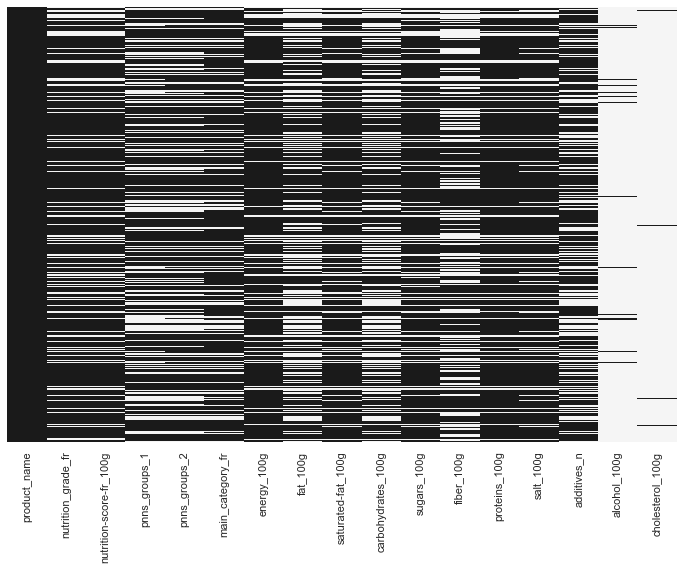

In [25]:
plt.figure(figsize=(12,8))
plt.tick_params(labelleft=False)
sns.heatmap(df.isna(), cbar=False, cmap=['k', 'whitesmoke'])

In [26]:
df.isna().mean().sort_values()

product_name               0.004545
energy_100g                0.144532
proteins_100g              0.147880
salt_100g                  0.170871
sugars_100g                0.171631
saturated-fat_100g         0.172982
nutrition-score-fr_100g    0.185491
nutrition_grade_fr         0.185491
main_category_fr           0.232401
pnns_groups_2              0.297632
pnns_groups_1              0.320454
additives_n                0.327447
fat_100g                   0.380732
carbohydrates_100g         0.386473
fiber_100g                 0.390623
alcohol_100g               0.970762
cholesterol_100g           0.996496
dtype: float64

# Analyse des données quantitatives

In [27]:
df.describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,additives_n,alcohol_100g,cholesterol_100g
count,57888.000000,6.079900e+04,44012.000000,58777.000000,43604.000000,58873.000000,43309.000000,60561.000000,58927.000000,47799.000000,2078.000000,249.000000
mean,8.598172,1.168804e+03,13.243576,5.389584,27.378013,13.246220,2.523931,7.795289,1.163696,1.903764,9.085808,0.060354
std,9.021356,1.322872e+04,16.862843,8.533552,27.295043,19.008464,4.619034,7.910278,4.311255,2.589077,10.379445,0.690866
min,-15.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.270000e+02,1.300000,0.300000,4.000000,1.000000,0.000000,1.800000,0.080000,0.000000,1.100000,0.000000
50%,8.000000,1.029000e+03,6.800000,1.950000,14.000000,4.000000,1.300000,6.000000,0.570000,1.000000,6.200000,0.000000
75%,15.000000,1.639000e+03,21.000000,7.300000,52.800000,17.000000,3.200000,11.000000,1.250000,3.000000,12.500000,0.012500
max,40.000000,3.251373e+06,380.000000,210.000000,190.000000,105.000000,178.000000,100.000000,211.000000,31.000000,69.000000,10.900000


In [28]:
# nombre de colonnes de type 'float'
df.select_dtypes('float').columns.size

12

In [29]:
# nom des colonnes de type 'float'
for col in df.select_dtypes('float'):
    print(col)

nutrition-score-fr_100g
energy_100g
fat_100g
saturated-fat_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
additives_n
alcohol_100g
cholesterol_100g


## Apports nutritionnels

In [30]:
nutrition_facts = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
                   'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
                  'alcohol_100g', 'cholesterol_100g'
                  ]

Regardons la distribution des valeurs pour ces variables

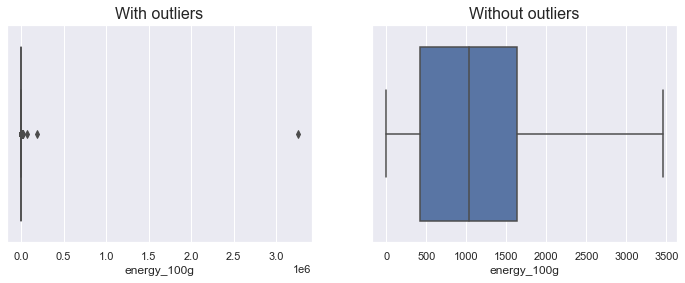

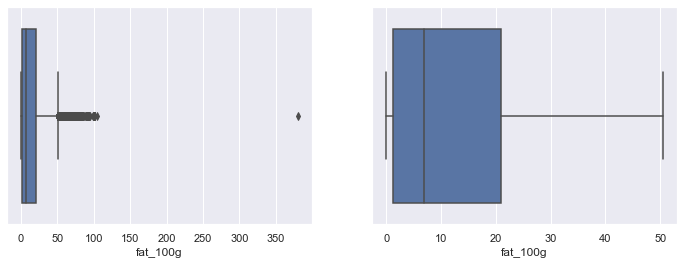

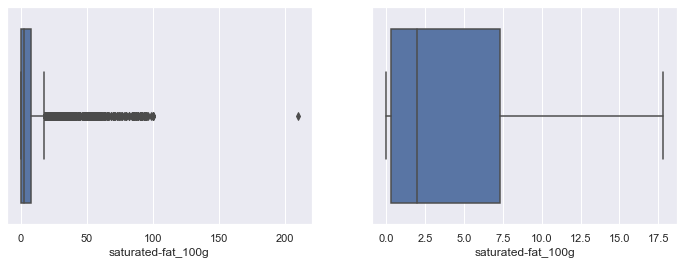

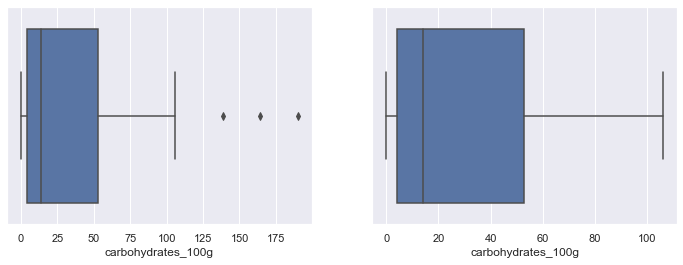

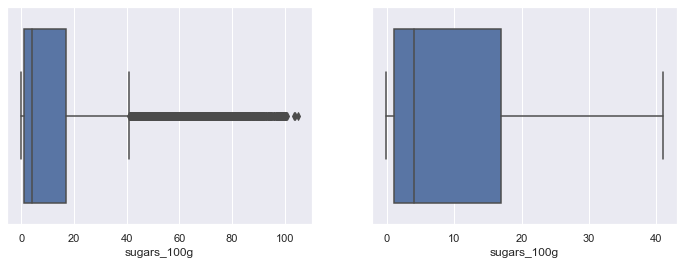

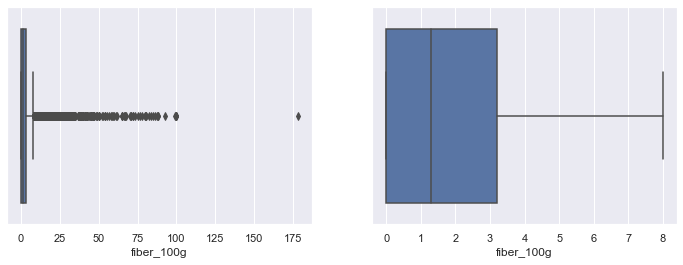

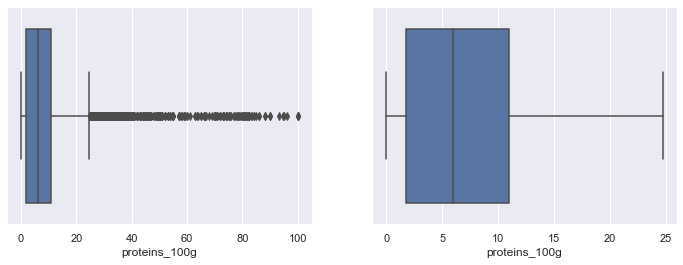

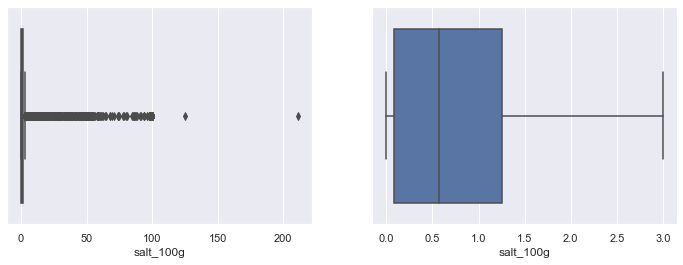

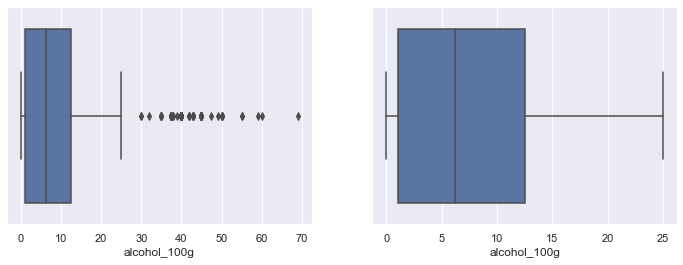

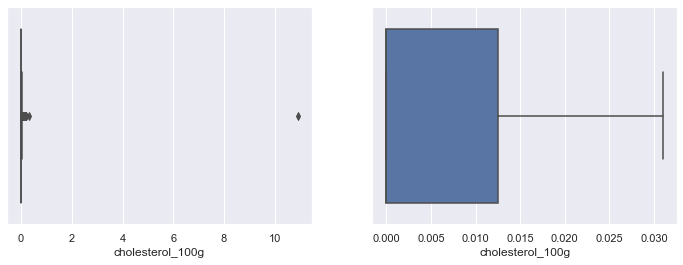

In [31]:
i = 0
for col in nutrition_facts:
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12,4))
    sns.boxplot(x=df[col], ax=axs[0])
    sns.boxplot(x=df[col], ax=axs[1], showfliers=False)
    if i == 0:
        axs[0].set_title('With outliers', fontsize=16)
        axs[1].set_title('Without outliers', fontsize=16)
        i += 1

## Score nutritionnel

<AxesSubplot:xlabel='nutrition-score-fr_100g'>

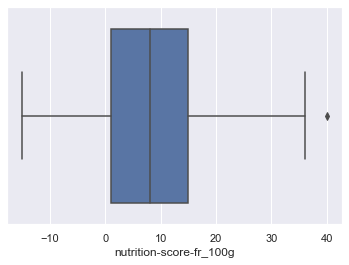

In [32]:
sns.boxplot(x='nutrition-score-fr_100g', data=df)

# Analyse des variables qualitatives

## Nutriscore

In [33]:
df['nutrition_grade_fr'].unique()

array([nan, 'd', 'e', 'c', 'b', 'a'], dtype=object)

On va mettre les lettres en capitales

In [34]:
df['nutrition_grade_fr'] = df['nutrition_grade_fr'].str.upper()

In [35]:
df['nutrition_grade_fr'].unique()

array([nan, 'D', 'E', 'C', 'B', 'A'], dtype=object)

## pnns_groups_1

In [36]:
df['pnns_groups_1'].unique()

array(['Cereals and potatoes', 'Sugary snacks', 'Beverages', nan,
       'Fish Meat Eggs', 'Fruits and vegetables', 'Salty snacks',
       'Fat and sauces', 'Composite foods', 'Milk and dairy products',
       'fruits-and-vegetables', 'sugary-snacks', 'cereals-and-potatoes'],
      dtype=object)

Dans la variables `pnns_groups_1`, les valeurs 'Fruits and vegetables' et 'fruits-and-vegetables', 'Sugary snacks' et 'sugary-snacks', et  'Cereals and potatoes' et 'cereals-and-potatoes' semblent être identiques

In [37]:
mask = df['pnns_groups_1'] == 'fruits-and-vegetables'
df.loc[mask, 'pnns_groups_1'] = 'Fruits and vegetables'

mask = df['pnns_groups_1'] == 'sugary-snacks'
df.loc[mask, 'pnns_groups_1'] = 'Sugary snacks'

mask = df['pnns_groups_1'] == 'cereals-and-potatoes'
df.loc[mask, 'pnns_groups_1'] = 'Cereals and potatoes'

In [38]:
df['pnns_groups_1'].unique()

array(['Cereals and potatoes', 'Sugary snacks', 'Beverages', nan,
       'Fish Meat Eggs', 'Fruits and vegetables', 'Salty snacks',
       'Fat and sauces', 'Composite foods', 'Milk and dairy products'],
      dtype=object)

## pnns_groups_2

In [39]:
display(df['pnns_groups_2'].unique())
df['pnns_groups_2'].unique().size

array(['Legumes', 'Biscuits and cakes', 'Non-sugared beverages', nan,
       'Sweetened beverages', 'Meat', 'Soups', 'Appetizers',
       'Dressings and sauces', 'Chocolate products', 'Sweets',
       'Dried fruits', 'Nuts', 'One-dish meals', 'Cheese', 'Fruits',
       'Fats', 'Alcoholic beverages', 'Pizza pies and quiche',
       'Vegetables', 'Breakfast cereals', 'Cereals', 'Fruit juices',
       'vegetables', 'Ice cream', 'Milk and yogurt', 'Bread',
       'Fish and seafood', 'Tripe dishes', 'pastries', 'Processed meat',
       'Dairy desserts', 'Artificially sweetened beverages',
       'Fruit nectars', 'Sandwich', 'Potatoes', 'Eggs',
       'Salty and fatty products', 'fruits', 'legumes', 'cereals'],
      dtype=object)

41

On repère les valeurs identiques en identifiant celles qui se répètent une fois mises en minuscules

In [40]:
s = pd.Series(df['pnns_groups_2'].unique())
s = s.str.lower()
s[s.duplicated()]

23    vegetables
38        fruits
39       legumes
40       cereals
dtype: object

Dans la variable `pnns_groups_2`, les valeurs 'Vegetables' et 'vegetables', 'Fruits' et 'fruits', 'Cereals' et 'cereals', 'Legumes' et 'legumes' semblent être identiques.

In [41]:
mask = df['pnns_groups_2'] == 'vegetables'
df.loc[mask, 'pnns_groups_2'] = 'Vegetables'

mask = df['pnns_groups_2'] == 'fruits'
df.loc[mask, 'pnns_groups_2'] = 'Fruits'

mask = df['pnns_groups_2'] == 'cereals'
df.loc[mask, 'pnns_groups_2'] = 'Cereals'

mask = df['pnns_groups_2'] == 'legumes'
df.loc[mask, 'pnns_groups_2'] = 'Legumes'

In [42]:
display(df['pnns_groups_2'].unique())
df['pnns_groups_2'].unique().size

array(['Legumes', 'Biscuits and cakes', 'Non-sugared beverages', nan,
       'Sweetened beverages', 'Meat', 'Soups', 'Appetizers',
       'Dressings and sauces', 'Chocolate products', 'Sweets',
       'Dried fruits', 'Nuts', 'One-dish meals', 'Cheese', 'Fruits',
       'Fats', 'Alcoholic beverages', 'Pizza pies and quiche',
       'Vegetables', 'Breakfast cereals', 'Cereals', 'Fruit juices',
       'Ice cream', 'Milk and yogurt', 'Bread', 'Fish and seafood',
       'Tripe dishes', 'pastries', 'Processed meat', 'Dairy desserts',
       'Artificially sweetened beverages', 'Fruit nectars', 'Sandwich',
       'Potatoes', 'Eggs', 'Salty and fatty products'], dtype=object)

37

# Traitement des valeurs aberrantes

## energy_100g

D'après les valeurs statistiques de `energy_100g`, les valeurs semblent être exprimées majoritairement en kJ.
L'aliment le plus calorique est l'huile et contient 900 kcal pour 100g, soit 3765 kJ ($900\times4.184 = 3765$).
On va donc considérer toutes les valeurs au-dessus de 3765 comme des valeurs aberrantes. <br>
Source : https://sante.journaldesfemmes.fr/calories/classement/aliments/calories

On remplace les valeurs aberrantes par des nan

In [43]:
mask = df['energy_100g'] > 3800
df.loc[mask, 'energy_100g'] = np.nan

In [44]:
df['energy_100g'].describe()

count    60708.000000
mean      1104.989069
std        769.239339
min          0.000000
25%        427.000000
50%       1026.000000
75%       1636.000000
max       3774.000000
Name: energy_100g, dtype: float64

Regardons de nouveau le boxplot

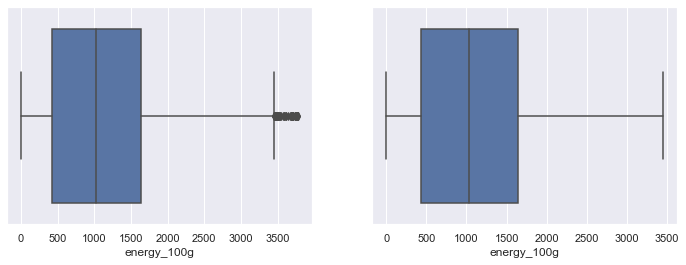

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(x=df['energy_100g'], showfliers=True, ax=axs[0])
sns.boxplot(x=df['energy_100g'], showfliers=False, ax=axs[1]);

## Autres apports nutritionnels

### Approche générale

On remplace les valeurs négatives par des nan

In [46]:
for col in nutrition_facts:
    mask = df[col] < 0
    df.loc[mask, col] = np.nan

On remplace les valeurs supérieures à 100 par des nan

In [47]:
for col in nutrition_facts:
    if col == 'energy_100g':
        continue
    mask = df[col] > 100
    df.loc[mask, col] = np.nan

### saturated-fat_100g et sugars_100g

Les valeurs pour `saturated-fat_100g` et `sugars_100g` doivent être inférieures à `fat_100g` et `carbohydrates` respectivement

In [48]:
# On remplace les valeurs aberrantes dans 'saturated-fat_100g'
mask = df['saturated-fat_100g'] > df['fat_100g']
df.loc[mask, 'saturated-fat_100g'] = np.nan

# On remplace les valeurs aberrantes dans 'sugars_100g'
mask = df['sugars_100g'] > df['carbohydrates_100g']
df.loc[mask, 'sugars_100g'] = np.nan

### Protéines

L'aliments le plus riches en protéines est la gélatine alimentaire et contient environ 88g pour 100g (https://sante.journaldesfemmes.fr/calories/classement/aliments/proteines). On peut donc supprimer les produits qui ont une valeur supérieure à celle-ci (sauf peut-être les protéines en poudre).

In [49]:
df[df['proteins_100g'] > 88]

,product_name,nutrition_grade_fr,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,additives_n,alcohol_100g,cholesterol_100g
127525,Savarez - Jeu De Cordes,A,-10.0,NaN,NaN,NaN,4.0,NaN,0.1,NaN,0.1,100.0,100.0,0.00,NaN,NaN,NaN
198798,Le saunier de camargue,E,20.0,NaN,NaN,NaN,243.0,NaN,36.0,NaN,0.5,0.0,96.0,100.00,NaN,NaN,NaN
213017,Edulcorant a l'extrait de stevia,B,0.0,NaN,NaN,Aliments et boissons à base de végétaux,1556.0,NaN,0.0,NaN,6.9,0.0,93.1,0.08,NaN,NaN,NaN
228018,Fromage blanc brebis,A,-1.0,NaN,NaN,NaN,364.0,NaN,3.2,NaN,2.9,0.0,94.7,0.10,NaN,NaN,NaN
273543,Le Hobbit : La Bataille Des Cinq Armés - Versi...,A,-10.0,NaN,NaN,NaN,4.0,NaN,0.0,NaN,0.0,100.0,100.0,0.00,NaN,NaN,NaN
274144,Impact whey isolate,B,1.0,NaN,NaN,NaN,1561.0,0.3,0.3,2.5,2.5,NaN,90.0,0.50,NaN,NaN,NaN
274145,"Myprotein Impact Whey Isolate, Geschmacksneutral",B,1.0,NaN,NaN,NaN,1561.0,NaN,0.3,NaN,0.0,0.0,90.0,0.50,NaN,NaN,NaN
283105,Eau,E,24.0,NaN,NaN,NaN,418.0,NaN,100.0,NaN,100.0,100.0,100.0,2.00,NaN,NaN,NaN
285429,Marshall - Major Noir,C,10.0,NaN,NaN,NaN,21.0,NaN,5.0,NaN,5.0,100.0,100.0,50.00,NaN,NaN,NaN
303889,Mini Gressins,D,11.0,NaN,NaN,NaN,1640.0,NaN,4.0,NaN,2.5,3.5,95.0,2.00,NaN,NaN,NaN


On va supprimer ces éléments sauf les protéines

In [50]:
mask_1 = df['proteins_100g'] > 88
mask_2 = df['product_name'].str.lower().str.contains('whey').fillna(False)
df = df[~(mask_1 & ~mask_2)]

In [51]:
df.shape

(71063, 17)

### Fibres

L'aliment le plus riche en fibres est la cannelle et contient 43,5g pour 100g (https://sante.journaldesfemmes.fr/calories/classement/aliments/fibres).

In [52]:
df.loc[df['fiber_100g'] > 44, 'fiber_100g'] = np.nan

### Cholesterol

L'aliment que l'on peut trouver au supermarché et qui contient le plus de cholestérol est le foie gras de canard avec 1.040 g pour 100g (https://sante.journaldesfemmes.fr/calories/classement/aliments/cholesterol).

In [53]:
df.loc[df['cholesterol_100g'] > 1, 'cholesterol_100g'] = np.nan

## Résultats

On regarde de nouveau les boxplot

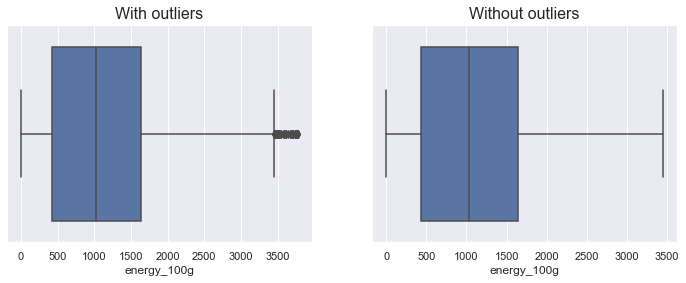

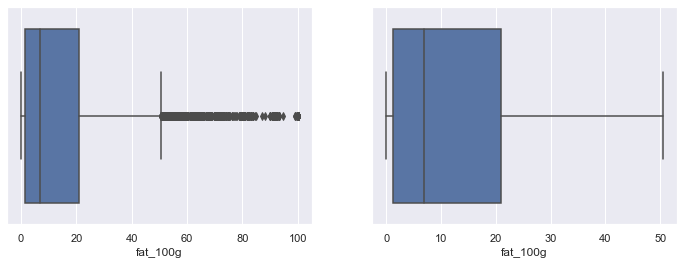

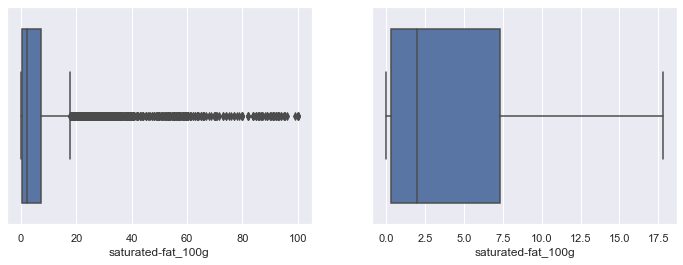

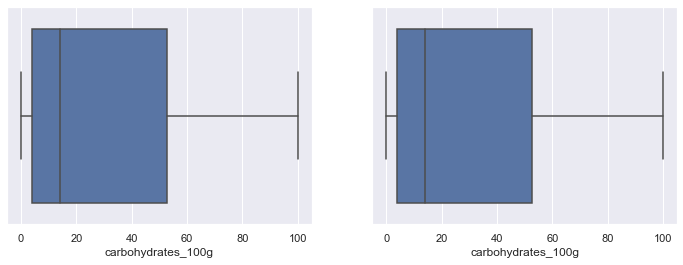

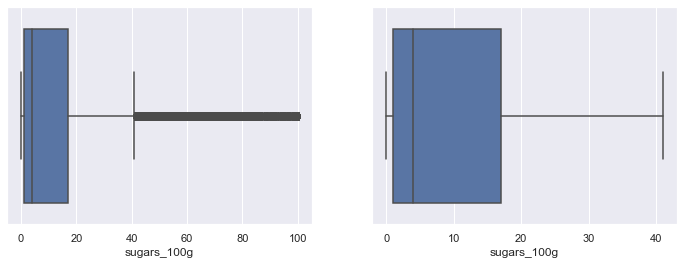

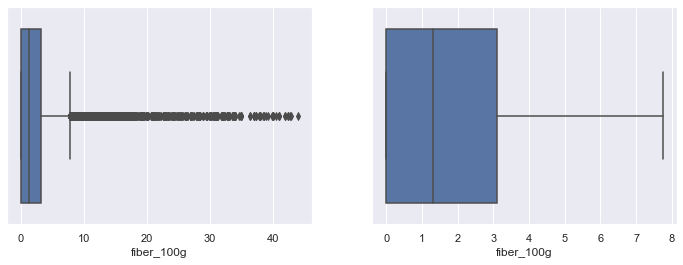

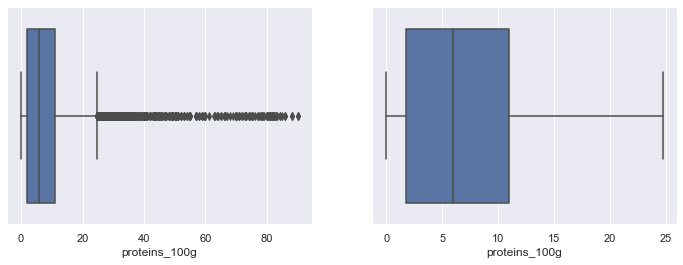

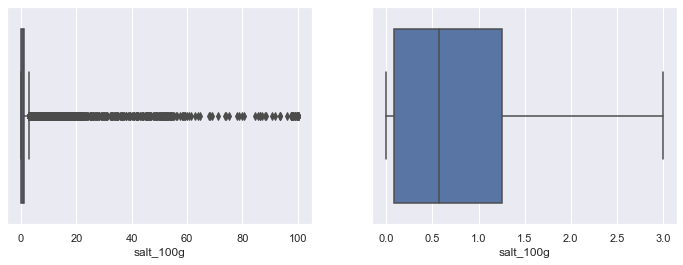

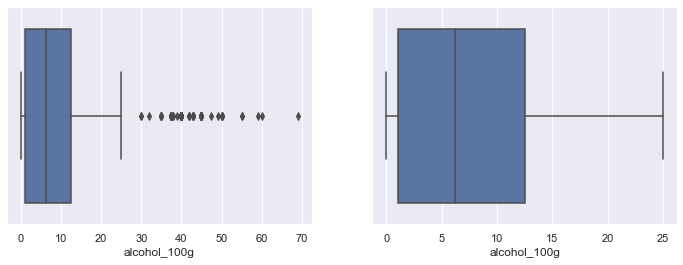

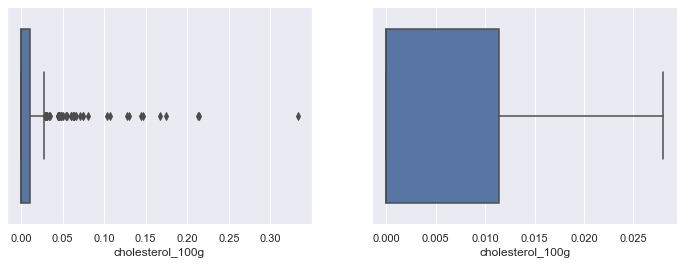

In [54]:
i = 0
for col in nutrition_facts:
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
    sns.boxplot(x=df[col], ax=axs[0])
    sns.boxplot(x=df[col], ax=axs[1], showfliers=False)
    if i == 0:
        axs[0].set_title('With outliers', fontsize=16)
        axs[1].set_title('Without outliers', fontsize=16)
        i += 1

In [55]:
# On sauvegarde les données nettoyées non imputées
df.to_csv('df_nan.csv')

# Traitement des valeurs manquantes

In [56]:
df.isna().mean()

product_name               0.004545
nutrition_grade_fr         0.185511
nutrition-score-fr_100g    0.185511
pnns_groups_1              0.320378
pnns_groups_2              0.297553
main_category_fr           0.232329
energy_100g                0.145828
fat_100g                   0.380690
saturated-fat_100g         0.174085
carbohydrates_100g         0.386516
sugars_100g                0.172973
fiber_100g                 0.391681
proteins_100g              0.147897
salt_100g                  0.170919
additives_n                0.327371
alcohol_100g               0.970758
cholesterol_100g           0.996510
dtype: float64

## Eau

On attribue une note de **A** à toutes les boissons de la catégorie `Eaux` car c'est le nutriscore de l'eau par défaut.

In [57]:
df.loc[df['main_category_fr'] == 'Eaux', 'nutrition_grade_fr'] = 'A'

## Imputation par 0

Pour les variables `fiber_100g` et `alcohol_100g` on va remplacer les valeurs manquantes par 0 car la plupart des aliments ne contiennent pas de fibre ou d'alcool, on peut donc supposer que les valeurs manquantes correspondent en fait à des 0.

In [58]:
df.loc[:, ['fiber_100g', 'alcohol_100g', 'additives_n']] = df[['fiber_100g', 'alcohol_100g', 'additives_n']].fillna(0)

In [59]:
df[['fiber_100g', 'alcohol_100g', 'additives_n']].isna().mean()

fiber_100g      0.0
alcohol_100g    0.0
additives_n     0.0
dtype: float64

## IterativeImputer

Nous allons utiliser ici la fonction `IterativeImputer` de scikit-learn. Cependant, cette fonction n'est efficace qu'avec des variables qui sont corrélées entre elles. Nous allons donc d'abord étudier les corrélations entre les variables quantitatives de notre data set

### Etude des corrélations

Voyons d'abord les variables qui semblent corrélées entre elles à l'aide de la matrice des corrélations

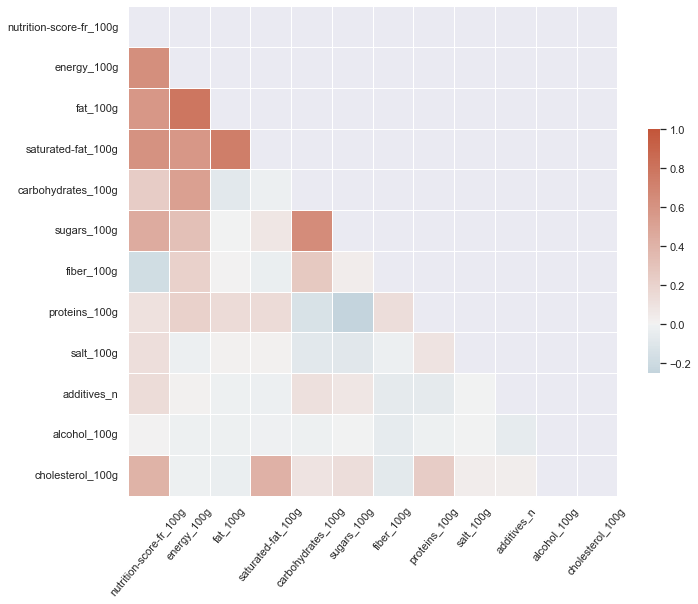

In [60]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=50);

Les variables `energy_100g`, `fat_100g` et `saturated-fat_100g` semblent corrélées entre elles. De même que `carbohydrates_100g` et `sugars_100g`.

On crée une fonction qui permet d'afficher les variables corrélées au-delà d'un certain seuil

In [61]:
def print_correlations(df, min_corr, max_corr=1):
    """
    Print the correlations between different variables if the value is between min_corr and max_corr.
    
    
    Parameters
    ----------
    df : class:`pandas.DataFrame`
        The DataFrame from which we compute the correlation matrix.
    
    min_corr : float
        Minimum correlation value to print.
    
    max_corr : float, default: 1
        Maximum correlation value to print.
    """
    
    # We fill the upper right diagonal with NaNs so we don't print the correlation of the variable
    # with itself and we dont print 2 times the same pair of variables
    corr = df.corr()
    for i in range(corr.shape[0]):
        for j in np.arange(corr.shape[1])[i:]:
            corr.iloc[i, j] = np.nan

    mask = (corr > min_corr) & (corr <= max_corr)

    for col in corr.columns:
        values = corr[mask][col].dropna().values.round(3) # we round to the thousandth
        if values.size > 0:
            indexes = corr[mask][col].dropna().index
            for i in range(indexes.size):
                print(f'{col} / {indexes[i]}' + '-'*(60-(len(col)+len(indexes[i]))) + f'({values[i]})')

On affiche les variables corrélées à plus de 50%

In [62]:
print_correlations(df, .5)

nutrition-score-fr_100g / energy_100g--------------------------(0.625)
nutrition-score-fr_100g / fat_100g-----------------------------(0.575)
nutrition-score-fr_100g / saturated-fat_100g-------------------(0.601)
energy_100g / fat_100g-----------------------------------------(0.784)
energy_100g / saturated-fat_100g-------------------------------(0.574)
energy_100g / carbohydrates_100g-------------------------------(0.517)
fat_100g / saturated-fat_100g----------------------------------(0.739)
carbohydrates_100g / sugars_100g-------------------------------(0.64)


On peut également remarquer la corrélation entre le score nutritionnel et les variables `energy_100g`, `fat_100g`, `saturated-fat_100g`, `sugars_100g`. C'est normal car plus un aliment est gras et sucré plus sa note est mauvaise et donc plus elle est élevée (Le score nutritionnel compte des valeurs entre -15 et 40 où -15 correspond à la meilleure note et 40 à la pire).

### Remplissage des valeurs manquantes

In [63]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

#### Variables liées aux matières grasses

In [64]:
fat = ['energy_100g', 'fat_100g', 'saturated-fat_100g']

imputer = IterativeImputer(random_state=0, max_iter=20, 
                           min_value=[0, 0, 0], max_value=[3765, 100, 100]
                          )
X = imputer.fit_transform(df[fat])

df[fat] = X
df[fat].isna().mean()

energy_100g           0.0
fat_100g              0.0
saturated-fat_100g    0.0
dtype: float64

#### Variables liées au sucre

In [65]:
sugar = ['carbohydrates_100g', 'sugars_100g']

imputer = IterativeImputer(random_state=0, max_iter=20, min_value=[0, 0], max_value=[100, 100])
X = imputer.fit_transform(df[sugar])

df[sugar] = X
df[sugar].isna().mean()

carbohydrates_100g    0.0
sugars_100g           0.0
dtype: float64

On vérifie s'il y a des valeurs aberrantes

In [66]:
df[df['saturated-fat_100g'] > df['fat_100g']].shape

(2868, 17)

In [67]:
df[df['sugars_100g'] > df['carbohydrates_100g']].shape

(0, 17)

On les remplace par des nan

In [68]:
df.loc[df['saturated-fat_100g'] > df['fat_100g'], ['saturated-fat_100g', 'fat_100g']] = np.nan

## Médiane

On va remplir les valeurs manquantes des variables numériques en fonction de leur catégorie (`main_category_fr`) puis en fonction de leur groupe (`pnns_groups_2`) s'il reste des nan, sauf pour la variable `cholesterol_100g` dont on s'occupera plus tard

In [69]:
columns = list(df.select_dtypes(np.number))
columns.remove('cholesterol_100g')
df[columns].isna().mean().sort_values()

energy_100g                0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
fiber_100g                 0.000000
additives_n                0.000000
alcohol_100g               0.000000
fat_100g                   0.040359
saturated-fat_100g         0.040359
proteins_100g              0.147897
salt_100g                  0.170919
nutrition-score-fr_100g    0.185511
dtype: float64

On commence par remplacer par la médiane des aliments qui ont la même valeur de `main_category_fr`

In [70]:
df.loc[:, columns] = df[columns].fillna(df.groupby('main_category_fr')[columns].transform('median'))

In [71]:
df[columns].isna().mean()

nutrition-score-fr_100g    0.001393
energy_100g                0.000000
fat_100g                   0.000366
saturated-fat_100g         0.000366
carbohydrates_100g         0.000000
sugars_100g                0.000000
fiber_100g                 0.000000
proteins_100g              0.000493
salt_100g                  0.001112
additives_n                0.000000
alcohol_100g               0.000000
dtype: float64

Ensuite, on remplace par la médiane des aliments qui ont la même valeur de `pnns_groups_2`

In [72]:
df.loc[:, columns] = df[columns].fillna(df.groupby('pnns_groups_2')[columns].transform('median'))

In [73]:
df[columns].isna().mean()

nutrition-score-fr_100g    0.0
energy_100g                0.0
fat_100g                   0.0
saturated-fat_100g         0.0
carbohydrates_100g         0.0
sugars_100g                0.0
fiber_100g                 0.0
proteins_100g              0.0
salt_100g                  0.0
additives_n                0.0
alcohol_100g               0.0
dtype: float64

## cholesterol_100g

On va utiliser la même stratégie mais avec les données initiales pour lesquelles la colonne `cholesterol_100g` est bien plus remplie

On remplit d'abord en fonction de `main_category_fr`

In [74]:
df.loc[:, 'cholesterol_100g'] = df['cholesterol_100g'].fillna(data.groupby('main_category_fr')['cholesterol_100g'].transform('median'))

In [75]:
df['cholesterol_100g'].isna().mean()

0.3339853369545333

Puis en fonction de `pnns_groups_2`

In [76]:
df.loc[:, 'cholesterol_100g'] = df['cholesterol_100g'].fillna(data.groupby('pnns_groups_2')['cholesterol_100g'].transform('median'))

In [77]:
df['cholesterol_100g'].isna().mean()

0.20612695776986617

Puis de `pnns_groups_1`

In [78]:
df.loc[:, 'cholesterol_100g'] = df['cholesterol_100g'].fillna(data.groupby('pnns_groups_1')['cholesterol_100g'].transform('median'))

In [79]:
df['cholesterol_100g'].isna().mean()

0.1932229148783474

Enfin, pour les nan qu'il reste on prend simplement la médiane de l'ensemble des valeurs

In [80]:
df.loc[:, 'cholesterol_100g'] = df['cholesterol_100g'].fillna(df['cholesterol_100g'].median())

In [81]:
df['cholesterol_100g'].isna().mean()

0.0

Toutes les variables quantitatives sont maintenant remplies

In [82]:
df.select_dtypes(np.number).isna().mean()

nutrition-score-fr_100g    0.0
energy_100g                0.0
fat_100g                   0.0
saturated-fat_100g         0.0
carbohydrates_100g         0.0
sugars_100g                0.0
fiber_100g                 0.0
proteins_100g              0.0
salt_100g                  0.0
additives_n                0.0
alcohol_100g               0.0
cholesterol_100g           0.0
dtype: float64

## Attribution du nutriscore

On comence par s'assurer que les valeurs de `nutrition-score-fr_100g` sont des entiers

In [83]:
# Vérifions la présence de valeurs décimales
arr = df['nutrition-score-fr_100g'].unique()
arr[arr != arr.astype(int)]

array([ 4.5, 12.5,  1.5,  6.5, -1.5, 15.5, 19.5,  9.5, -3.5, 10.5])

In [84]:
# On arrondie les valeurs et les convertie au format 'int8'
df['nutrition-score-fr_100g'] = df['nutrition-score-fr_100g'].round().astype('int8')

In [85]:
arr = df['nutrition-score-fr_100g'].unique()
arr[arr != arr.astype(int)]

array([], dtype=int8)

La lettre attribuée au produit en fonction du score nutritionnel est donnée ci-dessous :

<img src='images/logo.png' width=600px />

### Aliments solides

In [86]:
mask_1 = df['pnns_groups_1'] != 'Beverages'
df[mask_1].shape

(65205, 17)

In [87]:
# masque des nutriscores correspondant à la valeur A
mask_a = df['nutrition-score-fr_100g'] <= -1

# masque des nutriscores correspondant à la valeur B
mask_b = (df['nutrition-score-fr_100g'] >= 0) & (df['nutrition-score-fr_100g'] <= 2)

# masque des nutriscores correspondant à la valeur C
mask_c = (df['nutrition-score-fr_100g'] >= 3) & (df['nutrition-score-fr_100g'] <= 10)

# masque des nutriscores correspondant à la valeur D
mask_d = (df['nutrition-score-fr_100g'] >= 11) & (df['nutrition-score-fr_100g'] <= 18)

# masque des nutriscores correspondant à la valeur E
mask_e = df['nutrition-score-fr_100g'] >= 19

On vérifie qu'il ne manque aucun élément

In [88]:
df[mask_1].shape[0] == (df[mask_1 & mask_a].shape[0] 
                            + df[mask_1 & mask_b].shape[0] 
                            + df[mask_1 & mask_c].shape[0] 
                            + df[mask_1 & mask_d].shape[0] 
                            + df[mask_1 & mask_e].shape[0])

True

On remplit les valeurs manquantes

In [89]:
# par A
df.loc[df['nutrition_grade_fr'].isna() & mask_1 & mask_a, 'nutrition_grade_fr'] = 'A'

# par B
df.loc[df['nutrition_grade_fr'].isna() & mask_1 & mask_b, 'nutrition_grade_fr'] = 'B'

# par C
df.loc[df['nutrition_grade_fr'].isna() & mask_1 & mask_c, 'nutrition_grade_fr'] = 'C'

# par D
df.loc[df['nutrition_grade_fr'].isna() & mask_1 & mask_d, 'nutrition_grade_fr'] = 'D'

# par E
df.loc[df['nutrition_grade_fr'].isna() & mask_1 & mask_e, 'nutrition_grade_fr'] = 'E'

In [90]:
df['nutrition_grade_fr'].isna().mean()

0.022036784261852158

### Boissons

In [91]:
mask_2 = df['pnns_groups_1'] == 'Beverages'
df[mask_2].shape

(5858, 17)

In [92]:
# masque des nutriscores correspondant à la valeur A
mask_b = df['nutrition-score-fr_100g'] <= -1

# masque des nutriscores correspondant à la valeur C
mask_c = (df['nutrition-score-fr_100g'] >= 2) & (df['nutrition-score-fr_100g'] <= 5)

# masque des nutriscores correspondant à la valeur D
mask_d = (df['nutrition-score-fr_100g'] >= 6) & (df['nutrition-score-fr_100g'] <= 9)

# masque des nutriscores correspondant à la valeur E
mask_e = df['nutrition-score-fr_100g'] >= 10

On vérifie qu'il ne manque aucun élément

In [93]:
df[mask_2].shape[0] == (df[mask_2 & mask_a].shape[0] 
                            + df[mask_2 & mask_b].shape[0] 
                            + df[mask_2 & mask_c].shape[0] 
                            + df[mask_2 & mask_d].shape[0] 
                            + df[mask_2 & mask_e].shape[0])

False

On remplit les valeurs manquantes

In [94]:
# par A
df.loc[df['nutrition_grade_fr'].isna() & mask_2 & mask_a, 'nutrition_grade_fr'] = 'A'

# par B
df.loc[df['nutrition_grade_fr'].isna() & mask_2 & mask_b, 'nutrition_grade_fr'] = 'B'

# par C
df.loc[df['nutrition_grade_fr'].isna() & mask_2 & mask_c, 'nutrition_grade_fr'] = 'C'

# par D
df.loc[df['nutrition_grade_fr'].isna() & mask_2 & mask_d, 'nutrition_grade_fr'] = 'D'

# par E
df.loc[df['nutrition_grade_fr'].isna() & mask_2 & mask_e, 'nutrition_grade_fr'] = 'E'

In [95]:
df['nutrition_grade_fr'].isna().mean()

0.0005628808240575264

Regardons la répartition des différentes notes dans notre tableau

In [96]:
# palette de couleurs correspondant aux couleurs du nutriscore
palette = ['green', 'limegreen', 'gold', 'tab:orange', 'tab:red']

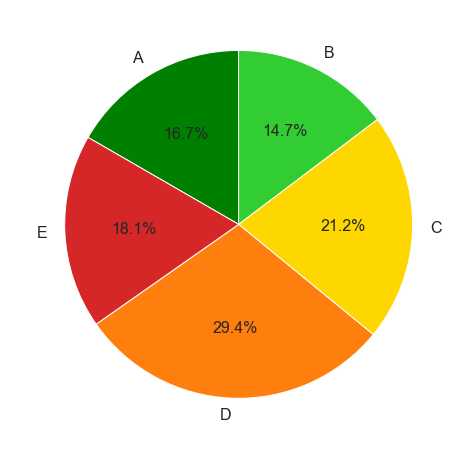

In [97]:
fig, ax = plt.subplots(figsize=(8,8))
df["nutrition_grade_fr"].value_counts().sort_index().plot.pie(counterclock=False,
                                                             startangle=150, autopct='%1.1f%%', ax=ax,
                                                             textprops={'fontsize':16}, colors=palette
                                                             )
ax.set_ylabel(' ');

On compare avec les répartition des nutriscores dans le data set avant imputation

In [98]:
df_nan = pd.read_csv('df_nan.csv', index_col=0)

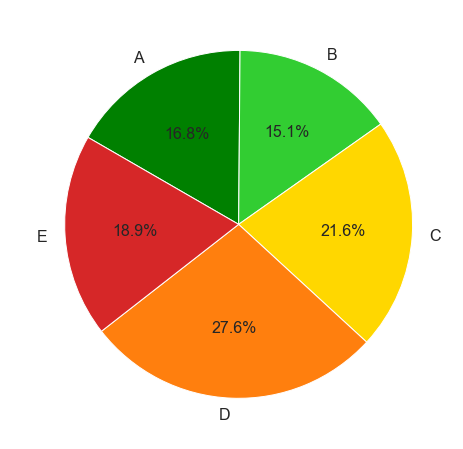

In [99]:
fig, ax = plt.subplots(figsize=(8,8))
df_nan["nutrition_grade_fr"].value_counts().sort_index().plot.pie(counterclock=False,
                                                             startangle=150, autopct='%1.1f%%', ax=ax,
                                                             textprops={'fontsize':16}, colors=palette
                                                             );
ax.set_ylabel(' ');

In [100]:
# Différence en %
counts_after = df["nutrition_grade_fr"].value_counts(normalize=True).sort_index()
counts_before = df_nan["nutrition_grade_fr"].value_counts(normalize=True).sort_index()
(counts_after - counts_before)*100

A   -0.137109
B   -0.376617
C   -0.407108
D    1.728837
E   -0.808002
Name: nutrition_grade_fr, dtype: float64

Il y a un léger écart pour les notes **D** et **E** mais sinon les proportions ont peu changé

# Export des données au format csv

On peut enlever la colonne correspondant aux noms des produits car celle-ci ne nous intéressera pas pour l'analyse exploratoire

In [101]:
df = df.drop(['product_name'], axis=1)
df.to_csv('df.csv')